# Cleaning

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
%cd '/content/drive/MyDrive/TTNT/modular-code/lib/'

/content/drive/MyDrive/TTNT/modular-code/lib


In [70]:
# import the required libraries
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer


In [71]:
# display configurations
sns.set(font_scale=1.5)

pd.options.display.max_columns=200
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None

In [72]:
# read the dataset
dfr = pd.read_excel("../input/Real_Estate Data.xlsx" )

#### Preliminary exploration

In [73]:
# check the shape of the data
dfr.shape

(200, 17)

In [74]:
# check for the first 5 rows
dfr.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [75]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           200 non-null    int64  
 1   Location                          200 non-null    object 
 2   Sub-Area                          200 non-null    object 
 3   Propert Type                      200 non-null    object 
 4   Property Area in Sq. Ft.          200 non-null    object 
 5   Price in lakhs                    200 non-null    object 
 6   Price in Millions                 199 non-null    float64
 7   Company Name                      200 non-null    object 
 8   TownShip Name/ Society Name       200 non-null    object 
 9   Total TownShip Area in Acres      51 non-null     float64
 10  ClubHouse                         200 non-null    object 
 11  School / University in Township   200 non-null    object 
 12  Hospital

In [76]:
# rename a column
dfr.rename(columns={"Propert Type":"Property Type"}, inplace=True)

## Cleaning the property's characteristics

In [77]:
# Propert Type column needs cleaning
dfr["Property Type"].unique()

array(['1 BHK', '2 BHK', '3 BHK', '3 BHK Grand', '2BHK', '3BHK', '4BHK',
       '5BHK', '6BHK', '1BHK', 'shop', '2 bhk', '2bhk ', '3  bhk ',
       '3 bhk', '2bhk', '2.5 BHK', '3 BHK ', '4 bhk', '1 bhk', '2.5 bhk',
       '1bhk', '3bhk', '3.5bhk', '3.5 bhk', '3bhk ', '2+2 bhk', '3+2bhk ',
       '2 bhk ', '5 bhk', '1bhk ', '4.5bhk', '4bhk'], dtype=object)

In [78]:
dfr = dfr[ dfr["Property Type"]!="shop" ]
dfr.shape

(199, 17)

In [79]:
# Same for Property Area in Sq. Ft.
dfr["Property Area in Sq. Ft."].unique()

array([492, 774, 889, 1018, 743, 975, '877 to 912', '1077 to 1272', 905,
       1125, 1644, 2220, '662 to 845', '890 to 1212', 423, 665,
       '792 to 965', 462, 666, 750, 1030, 446, 796, 842, 865, 902, 1154,
       872, 934, 1088, 1109, 1163, 1419, 1485, 684, 990, 882, 1103, 543,
       '801 to 1125', '1272 to 2138', 320, 473, 581, 790, 820, 989, 1003,
       1182, 1579, 491, 659, 732, 809, 460, 734, 753, 675, 917, 670, 740,
       847, 936, 1032, 1698, 2267, 725, 731, 744, 923, 930, 792, 1180,
       860, 988, 1093, 456, 644, 785, 1060, 113, 664, 673, 682, 698, 1239,
       1315, 1388, 1463, 1671, 1687, 575, 751, 761, 871, 1166, 1206, 1272,
       1279, 646, 717, 436, 637, 642, 655, 668, 810, 735, 783, 805, 1074,
       1111, 535, 947, 697, 711, 980, 1400, 1772, 1662, 705, 726, 793,
       904, 1168, 1189, 479, 693, 808, 1086, 844, 873, 606, 611, 626, 691,
       835, 854, 715, '624 to 761', 968, 996, 1038, 489, 598, 616, 692,
       867, 908, 1624, 2043, 727, '561 to 902', '1056 to

In [80]:
def splitSum( e, flag=True ) :
    """
    Gives the total number of bedrooms / property area
    params :
        e : string, either the number of rooms or property area
        flag : boolean, True : number of bedrooms, False : property area
    return :
        float, number of bedrooms / Property Area
    """
    try :
        e = str(e).lower()
        e = re.sub(r"[,;@#?!&$+]+\ *", " ", e)
        e = re.sub(r"[a-z]+", " ", e)
        e = re.sub(r"\s\s", "", e)

        s2list = e.strip().split()
        sumList = sum(float(e) for e in s2list)

        # Computing the mean value for property area that look like
        # e.g. '1101 to 1113'
        e_norm = sumList if flag else sumList/len(s2list)
        return e_norm

    except :
        return np.nan

##############################
def normaliseProps( df ) :
    """
    Extracts the number of rooms from 'Property Type' columns and mean values for
    "Property Area in Sq. Ft."
    Params :
        data : Pandas dataframe, the input data
    Returns :
        Pandas dataframe
    """
    data = df.copy()
    data["Property Type"] = data["Property Type"].apply( splitSum )
    data["Property Area in Sq. Ft."] = \
       data["Property Area in Sq. Ft."]\
            .apply( lambda x : splitSum(x, False) )

    return data


In [81]:
# Normalising the Propert Type and Property Area in Sq. Ft.
df_norm = normaliseProps(dfr)

In [82]:
df_norm["Property Type"].unique()

array([1. , 2. , 3. , 4. , 5. , 6. , 2.5, 3.5, 4.5])

In [83]:
df_norm["Property Area in Sq. Ft."].unique()


array([ 492. ,  774. ,  889. , 1018. ,  743. ,  975. ,  894.5, 1174.5,
        905. , 1125. , 1644. , 2220. ,  753.5, 1051. ,  423. ,  665. ,
        878.5,  462. ,  666. ,  750. , 1030. ,  446. ,  796. ,  842. ,
        865. ,  902. , 1154. ,  872. ,  934. , 1088. , 1109. , 1163. ,
       1419. , 1485. ,  684. ,  990. ,  882. , 1103. ,  543. ,  963. ,
       1705. ,  320. ,  473. ,  581. ,  790. ,  820. ,  989. , 1003. ,
       1182. , 1579. ,  491. ,  659. ,  732. ,  809. ,  460. ,  734. ,
        753. ,  675. ,  917. ,  670. ,  740. ,  847. ,  936. , 1032. ,
       1698. , 2267. ,  725. ,  731. ,  744. ,  923. ,  930. ,  792. ,
       1180. ,  860. ,  988. , 1093. ,  456. ,  644. ,  785. , 1060. ,
        113. ,  664. ,  673. ,  682. ,  698. , 1239. , 1315. , 1388. ,
       1463. , 1671. , 1687. ,  575. ,  751. ,  761. ,  871. , 1166. ,
       1206. , 1272. , 1279. ,  646. ,  717. ,  436. ,  637. ,  642. ,
        655. ,  668. ,  810. ,  735. ,  783. ,  805. , 1074. , 1111. ,
      

In [84]:
df_norm.dtypes

,0
Sr. No.,int64
Location,object
Sub-Area,object
Property Type,float64
Property Area in Sq. Ft.,float64
Price in lakhs,object
Price in Millions,float64
Company Name,object
TownShip Name/ Society Name,object
Total TownShip Area in Acres,float64


## Cleaning the outliers

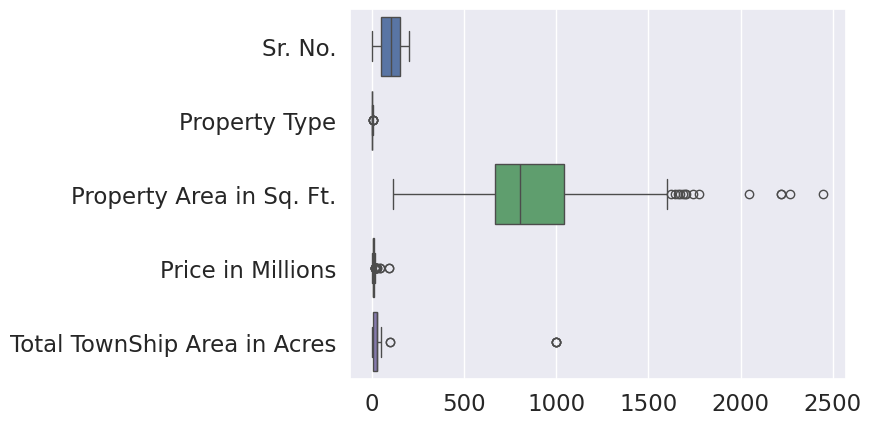

In [85]:
sns.boxplot( data=df_norm , orient="h")
plt.show()

In [86]:
def computeUpperFence( df_col, up=True ):
    """
    Computes the upper/lower fence for a given column.
    Params:
        df_col: Pandas series, dataframe column
        up: boolean, True for upper fence, False for lower fence
    Return:
        upper/lower fence value : float
    """
    iqr = df_col.quantile(.75) - df_col.quantile(.25) # inter quartile range
    if up:
        return df_col.quantile(.75) + iqr*1.5
    return df_col.quantile(.25) - iqr*1.5

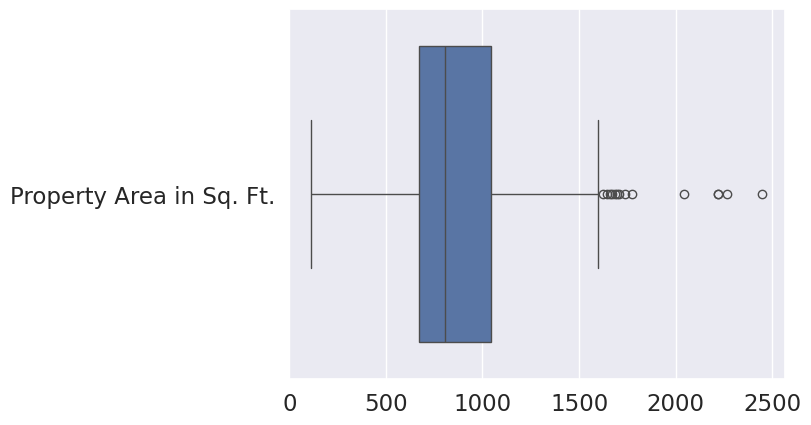

In [87]:
# Looking for outliers
sns.boxplot( data=df_norm[["Property Area in Sq. Ft."]], orient="h" )
plt.show()

In [88]:
# Checking the outliers for Property Area in Sq. Ft.
x_pa = df_norm['Property Area in Sq. Ft.']
pa_up_lim = computeUpperFence(x_pa)
df_norm[ x_pa>pa_up_lim]
# They are atypical not outliers. They have many rooms.

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
10,11,"Pune, Maharashtra, India",Ravet,4.0,1644.0,135,13.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
41,42,"Pune, Maharashtra, India",Keshav Nagar,3.0,1705.0,Null,NaN,Mantra Properties,Mantra Insignia,NaN,Yes,No,No,No,Yes,Yes,Yes
67,68,"Pune, Maharashtra, India",kayani nagar,3.0,1698.0,249,24.9,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes
68,69,"Pune, Maharashtra, India",kayani nagar,4.0,2267.0,460,46.0,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes
96,97,"Pune, Maharashtra, India",NIBM,3.5,1671.0,211,21.1,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
97,98,"Pune, Maharashtra, India",NIBM,3.5,1687.0,213,21.3,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
128,129,"Pune, Maharashtra, India",Hinjewadi,5.0,1772.0,177,17.7,Shapoorji Paloonji,Sensorium,NaN,yes,no,no,no,yes,yes,yes
131,132,"Pune, Maharashtra, India",hadapsar,5.0,1662.0,130,13.0,Wellwisher Apartments,kiarah terrazo,NaN,no,no,no,no,yes,no,no


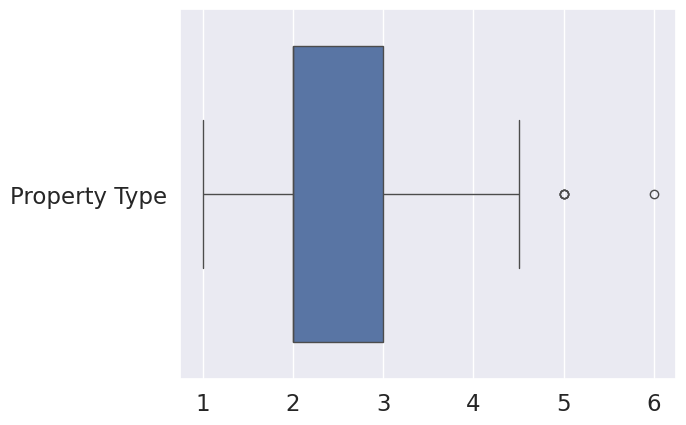

In [89]:
# Looking for outliers
sns.boxplot( data=df_norm[["Property Type"]], orient="h" )
plt.show()

In [90]:
# Checking the outliers for Property type.
x_prt = df_norm['Property Type']
prt_up_lim = computeUpperFence(x_prt)
df_norm[ x_prt>prt_up_lim]
# They are atypical not outliers. They have many rooms.

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
50,51,"Pune, Maharashtra, India",Akurdi,5.0,1579.0,163,16.3,Mantra Properties,Mantra Sky Tower,3.5,Yes,No,No,No,Yes,Yes,Yes
128,129,"Pune, Maharashtra, India",Hinjewadi,5.0,1772.0,177,17.7,Shapoorji Paloonji,Sensorium,NaN,yes,no,no,no,yes,yes,yes
131,132,"Pune, Maharashtra, India",hadapsar,5.0,1662.0,130,13.0,Wellwisher Apartments,kiarah terrazo,NaN,no,no,no,no,yes,no,no


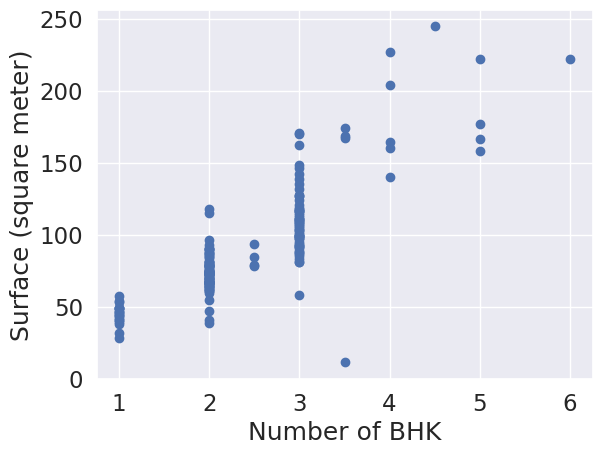

In [91]:
plt.scatter(df_norm["Property Type"],
            df_norm["Property Area in Sq. Ft."]*.1)
plt.xlabel("Number of BHK")
plt.ylabel("Surface (square meter)")
plt.show()

In [92]:
df_norm.shape

(199, 17)

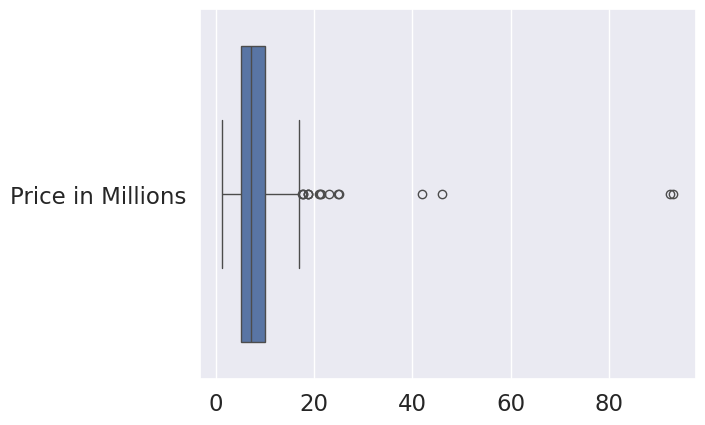

In [93]:
sns.boxplot( data=df_norm[["Price in Millions"]], orient="h" )
plt.show()

In [94]:
# Checking the outliers for Price in Millions
x_pim = df_norm['Price in Millions']
pim_up_lim = computeUpperFence(x_pim)
df_norm[ x_pim>pim_up_lim]
# They are essentially large apartments except 2.

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
67,68,"Pune, Maharashtra, India",kayani nagar,3.0,1698.0,249,24.9,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes
68,69,"Pune, Maharashtra, India",kayani nagar,4.0,2267.0,460,46.0,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes
73,74,"Pune, Maharashtra, India",pisoli,3.0,923.0,923,92.3,nirman developers,brookefield willows,NaN,yes,no,no,no,yes,yes,yes
74,75,"Pune, Maharashtra, India",pisoli,3.0,930.0,930,93.0,nirman developers,brookefield willows,NaN,yes,no,no,no,yes,yes,yes
94,95,"Pune, Maharashtra, India",NIBM,3.0,1388.0,178,17.8,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
95,96,"Pune, Maharashtra, India",NIBM,3.0,1463.0,187,18.7,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
96,97,"Pune, Maharashtra, India",NIBM,3.5,1671.0,211,21.1,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
97,98,"Pune, Maharashtra, India",NIBM,3.5,1687.0,213,21.3,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes


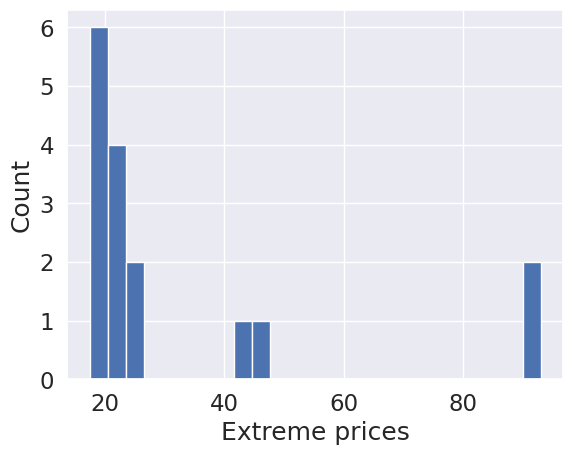

In [95]:
df_norm[ x_pim>pim_up_lim]["Price in Millions"].hist(bins=25)
plt.xlabel("Extreme prices")
plt.ylabel("Count")
plt.show()

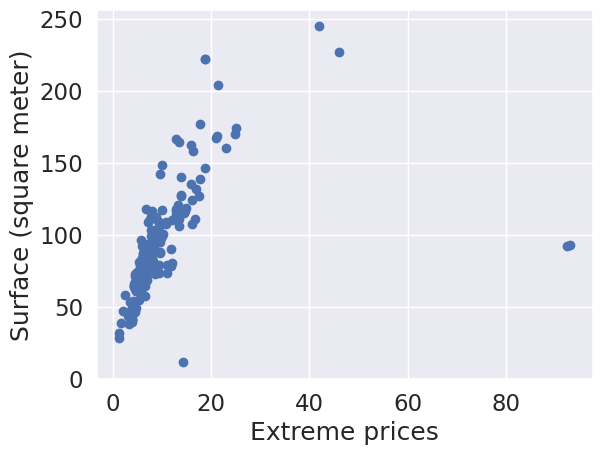

In [96]:
plt.scatter(df_norm["Price in Millions"],
            df_norm["Property Area in Sq. Ft."]*.1)
plt.xlabel("Extreme prices")
plt.ylabel("Surface (square meter)")
plt.show()

In [97]:
df_norm = df_norm[df_norm["Price in Millions"]<80]

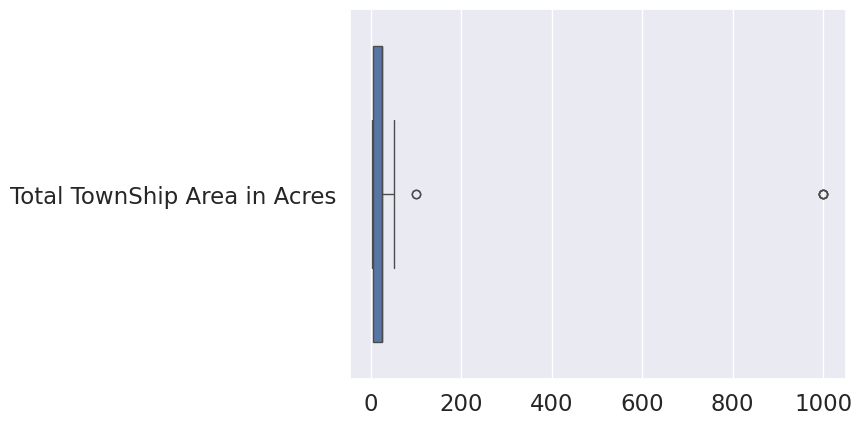

In [98]:
sns.boxplot( data=df_norm[["Total TownShip Area in Acres"]], orient="h" )
plt.show()

In [99]:
# Checking the outliers for Total TownShip Area in Acres
x_tta = df_norm['Total TownShip Area in Acres']
tta_up_lim = computeUpperFence(x_tta)
df_norm[ x_tta>tta_up_lim]
# Large cities are not outliers.

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1.0,492.0,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2.0,774.0,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3.0,889.0,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3.0,1018.0,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2.0,743.0,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
5,6,"Pune, Maharashtra, India",Mahalunge,3.0,975.0,95,9.5,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [100]:
tta_low_lim = computeUpperFence(x_tta)
df_norm[ x_tta<tta_low_lim]
# These are small sub-areas

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
6,7,"Pune, Maharashtra, India",Balewadi,2.0,894.5,75,7.5,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes
7,8,"Pune, Maharashtra, India",Balewadi,3.0,1174.5,100,10.0,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes
8,9,"Pune, Maharashtra, India",Ravet,2.0,905.0,65,6.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
9,10,"Pune, Maharashtra, India",Ravet,3.0,1125.0,88,8.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
10,11,"Pune, Maharashtra, India",Ravet,4.0,1644.0,135,13.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
13,14,"Pune, Maharashtra, India",Baner,2.0,753.5,58,5.8,VTP Reality,VTP Cierra,10.0,Yes,No,No,No,Yes,Yes,Yes
14,15,"Pune, Maharashtra, India",Baner,3.0,1051.0,95,9.5,VTP Reality,VTP Cierra,10.0,Yes,No,No,No,Yes,Yes,Yes
15,16,"Pune, Maharashtra, India",Mahalunge,1.0,423.0,40,4.0,VTP Reality,VTP Blue Water,50.0,Yes,No,No,No,Yes,Yes,Yes


## Price selection

In [101]:
# Comparing Price in Millions with Price in lakhs
df_norm["Price in lakhs"] = df_norm["Price in lakhs"]\
                    .apply(lambda x: pd.to_numeric(x, errors='coerce') )

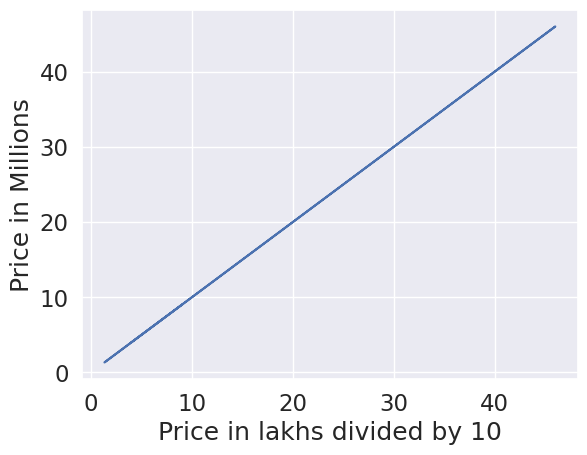

In [102]:
plt.plot( df_norm["Price in lakhs"]/10., df_norm["Price in Millions"] )
plt.xlabel("Price in lakhs divided by 10")
plt.ylabel("Price in Millions")
plt.show()


In [103]:
df_norm = df_norm.drop(columns=["Price in lakhs"])

## NaN values

In [104]:
def compute_fill_rate( df ) :
    """
    Computing the rate of non-NaNs for each column
    Params :
        df : Pandas dataframe, input data
    Return :
        Pandas dataframe
    """
    fr = pd.DataFrame(1-df.isnull().sum().values.reshape(1,-1)/df.shape[0],
                         columns=df.columns)
    return fr

###########################################
def plot_fill_rate( df ) :
    """
    Plot the fill rate
    df : Pandas dataframe, input data
    """
    fill_rate = compute_fill_rate( df )
    fig, ax = plt.subplots( figsize=(18,18) )
    sns.barplot(data=fill_rate, orient="h")
    ax.set_title( "Fill rate for columns", fontsize=28 )
    ax.set(xlim=(0, 1.))


###########################################
def drop_empty_axis( df, minFillRate, axis=1 ) :
    """
    Drops axes that do not meet the minimum non-Nan rate
    Params :
        df : Pandas dataframe
        minFillRate : float, minimum filled fraction [0,1]
        axis : int, 1 for column, 0 for row
    Returns :
        Pandas dataframe
    """
    i = 0 if axis==1 else 1
    return df.dropna( axis=axis, thresh=int(df.shape[i]*minFillRate) )



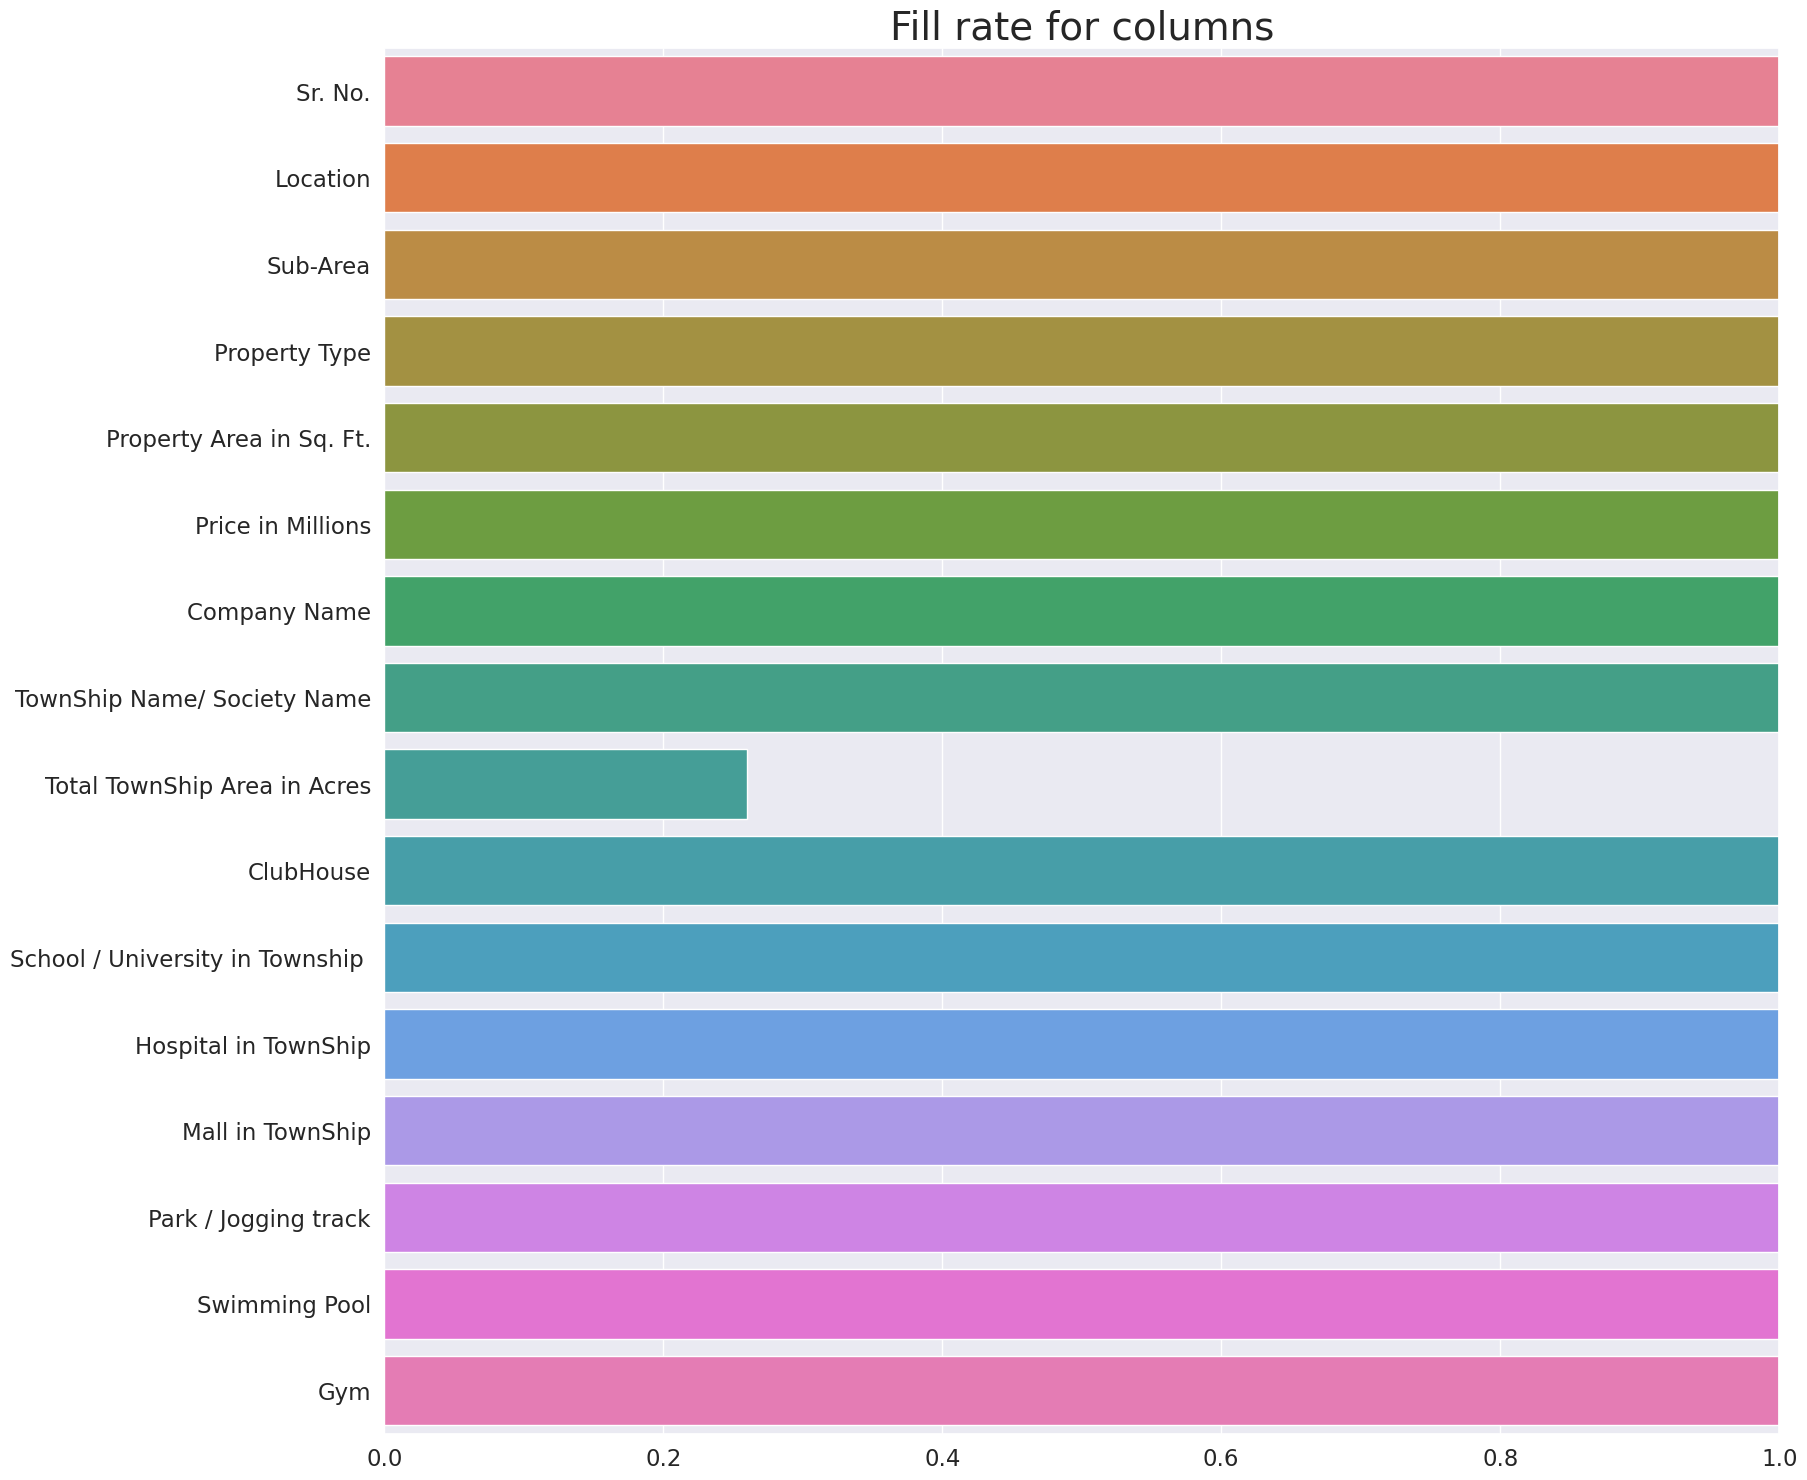

In [105]:
plot_fill_rate( df_norm )

In [106]:
compute_fill_rate( df_norm )

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.260204,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [107]:
# Total TownShip Area in Acres
df_norm[["Sub-Area", "TownShip Name/ Society Name", "Total TownShip Area in Acres" ]]\
    .sort_values("Sub-Area").reset_index(drop=True)

,Sub-Area,TownShip Name/ Society Name,Total TownShip Area in Acres
0,Akurdi,Mantra Sky Tower,3.5
1,Akurdi,Mantra Sky Tower,3.5
2,Akurdi,Mantra Sky Tower,3.5
3,Akurdi,Mantra Sky Tower,3.5
4,Akurdi,Mantra Sky Tower,3.5
5,Akurdi,Mantra Sky Tower,3.5
6,BANER,TEJ ELEVIA,2.5
7,BANER,vtp solitaire,NaN
8,BANER,SUPREME ESTIA,5.0
9,BANER,SUPREME ESTIA,5.0


In [108]:
# Drop columns filled by less than 50%
df_norm = drop_empty_axis(df_norm, minFillRate=.5)

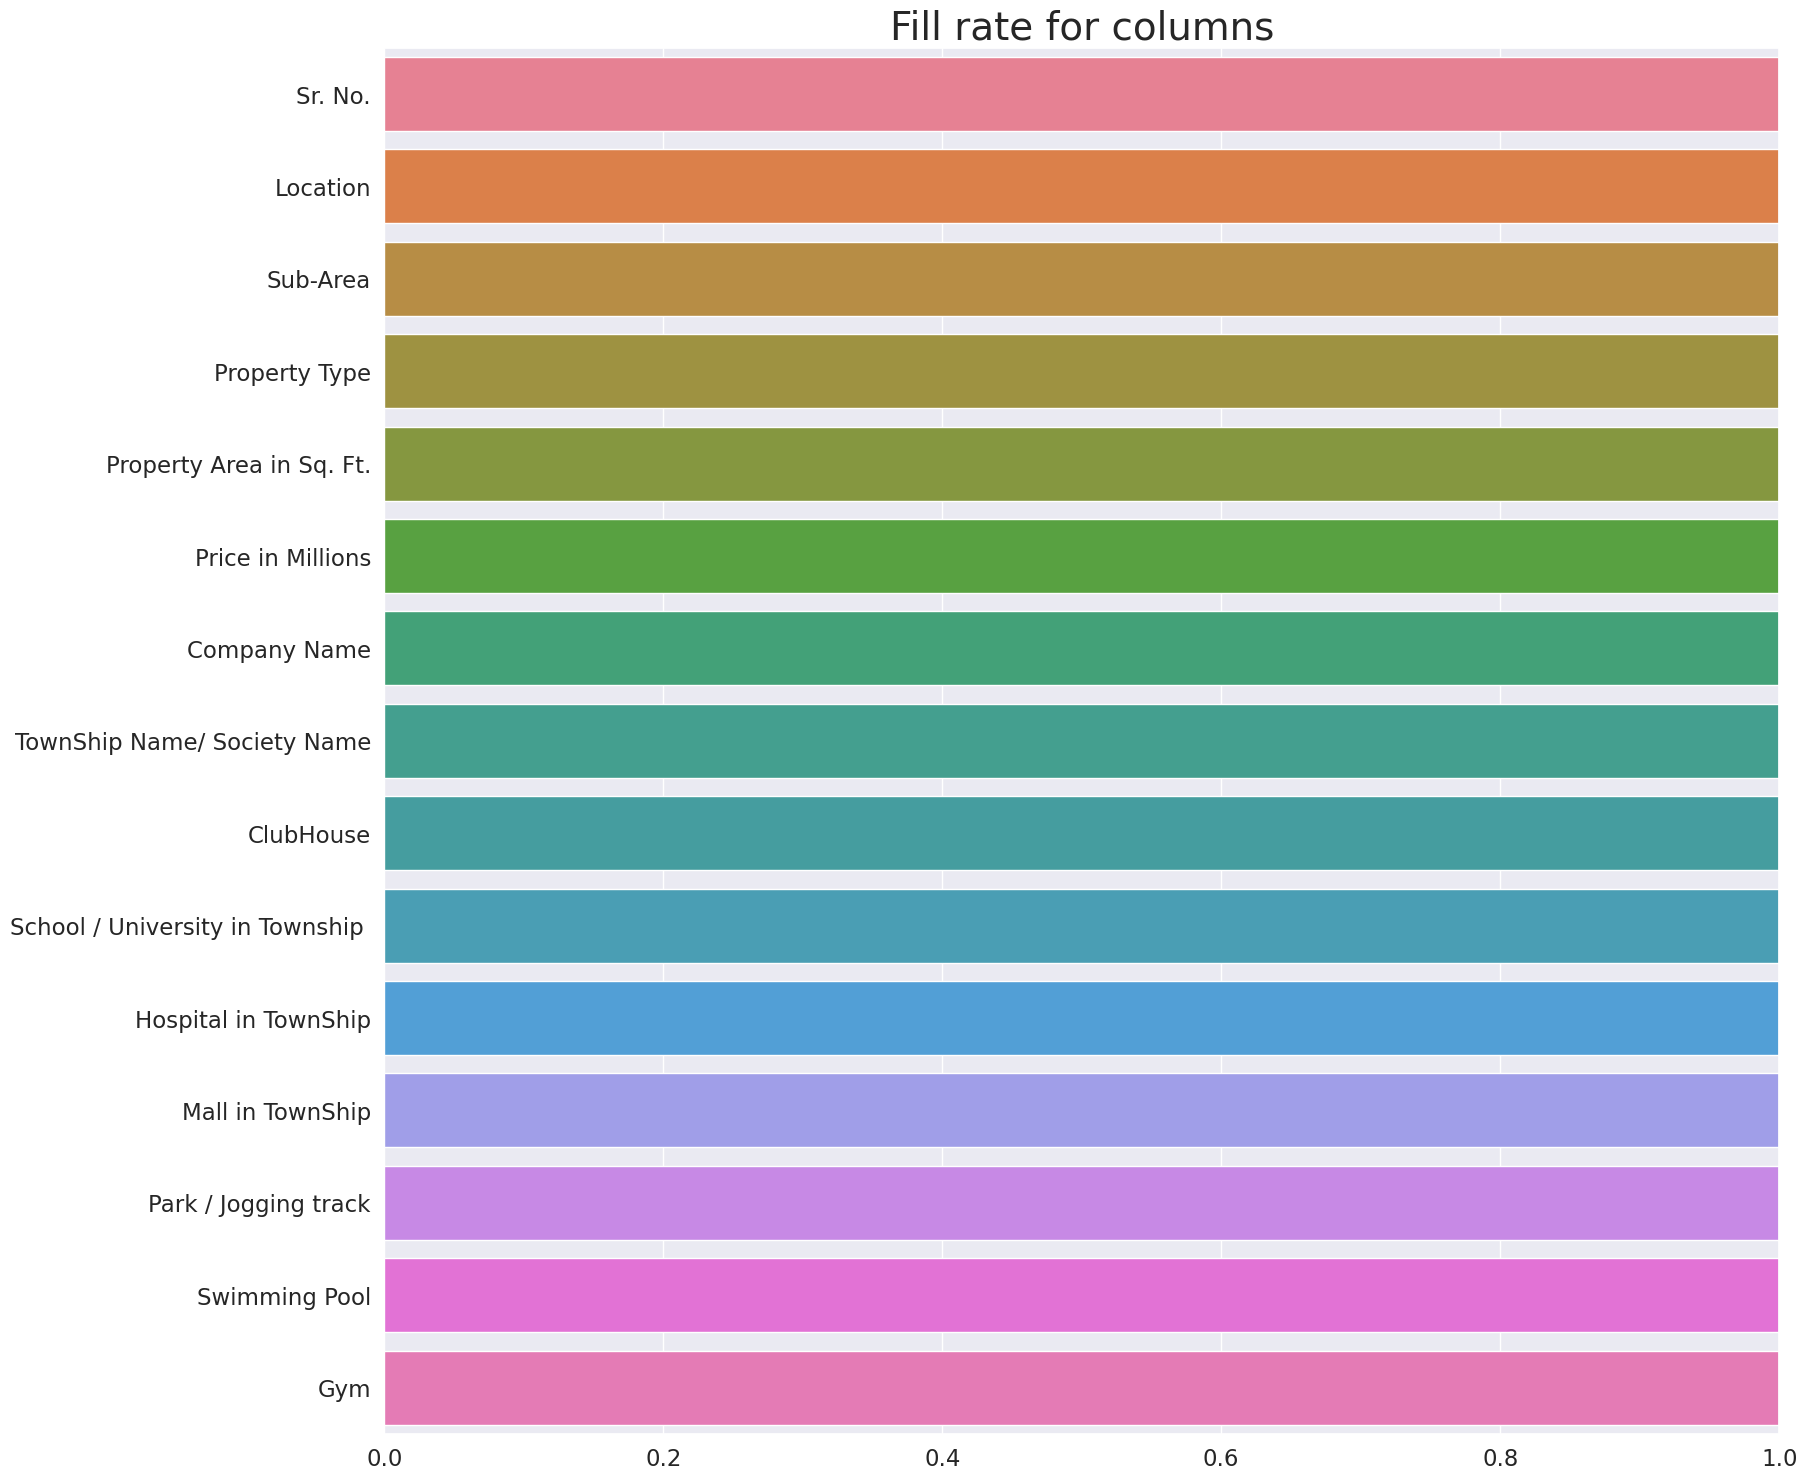

In [109]:
plot_fill_rate( df_norm )

## Regularising the categorical columns

In [110]:
df_norm.select_dtypes(include="object").head(3)


,Location,Sub-Area,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes


#### Binary categorical columns

In [111]:
binary_cols = df_norm.iloc[:,-7:].columns.to_list()
binary_cols

['ClubHouse',
 'School / University in Township ',
 'Hospital in TownShip',
 'Mall in TownShip',
 'Park / Jogging track',
 'Swimming Pool',
 'Gym']

In [112]:
def print_uniques( cols, df=df_norm ):
    for col in cols:
        list_unique = df[col].unique()
        list_unique.sort()
        print(col, ":\n", list_unique)
        print("Number of unique categories:", len(list_unique))
        print("--------------------")

In [113]:
print_uniques(binary_cols)

ClubHouse :
 ['Yes' 'no' 'no ' 'yes']
Number of unique categories: 4
--------------------
School / University in Township  :
 ['No' 'Yes' 'no']
Number of unique categories: 3
--------------------
Hospital in TownShip :
 ['No' 'Yes' 'no']
Number of unique categories: 3
--------------------
Mall in TownShip :
 ['No' 'Yes' 'no' 'no ']
Number of unique categories: 4
--------------------
Park / Jogging track :
 ['No' 'Yes' 'no' 'yes']
Number of unique categories: 4
--------------------
Swimming Pool :
 ['No' 'Yes' 'no' 'no ' 'yes']
Number of unique categories: 5
--------------------
Gym :
 ['Yes' 'no' 'no ' 'yes']
Number of unique categories: 4
--------------------


In [114]:
for col in binary_cols:
    df_norm[col] = df_norm[col].apply(lambda x: x.strip().lower())

print_uniques(binary_cols)

ClubHouse :
 ['no' 'yes']
Number of unique categories: 2
--------------------
School / University in Township  :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Hospital in TownShip :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Mall in TownShip :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Park / Jogging track :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Swimming Pool :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Gym :
 ['no' 'yes']
Number of unique categories: 2
--------------------


#### Multi-categorical columns

In [115]:
obj_cols = df_norm.select_dtypes(include="object").columns.to_list()
multiCat_cols = list(set(obj_cols)^set(binary_cols))
multiCat_cols

['TownShip Name/ Society Name', 'Sub-Area', 'Location', 'Company Name']

In [116]:
for col in multiCat_cols:
    df_norm[col] = df_norm[col].apply(lambda x: x.strip().lower())

In [117]:
print_uniques(multiCat_cols)

TownShip Name/ Society Name :
 ['7hills' 'abitante fiore' 'anp universe' 'anutham' 'atulya kanhe'
 'aureta' 'bhaktamar residency' 'bliss solitaire' 'bluegrass residences'
 'brookefield willows' 'dolphin garima' 'eternia 2.0'
 'godrej hills retreat' 'impero' 'infinity' 'jade residences' 'k ville'
 'kalpataru serenity' 'khush vista' 'kiarah terrazo' 'lesiure town'
 'mahalunge riviera' 'mantra 29 gold' 'mantra insignia' 'mantra monarch'
 'mantra sky tower' 'neco beaumont' 'newton homes' 'om mangalam chaitanya'
 'oxy beaumonde' 'oxy eterno' 'parklane urbanjoy' 'presidenta' 'presidia'
 'puraniks sayama' 'rhythm county' 'river dale residency'
 'satyam serenity' 'satyam shery' 'satyam shivam' 'sensorium' 'simplicity'
 'sportsville' 'sukwani aspire' 'supreme estia' 'tej elevia'
 'tranquility annexe' 'unique legacy royale' 'urban skyline' 'vanaha'
 'vtp blue water' 'vtp cierra' 'vtp solitaire']
Number of unique categories: 53
--------------------
Sub-Area :
 ['akurdi' 'balewadi' 'baner' 'bavdha

In [118]:
df_norm.drop(columns=["Location"], inplace=True)

In [119]:
df_norm.head()

,Sr. No.,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in Millions,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,bavdhan,1.0,492.0,3.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
1,2,bavdhan,2.0,774.0,6.5,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
2,3,bavdhan,3.0,889.0,7.4,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
3,4,bavdhan,3.0,1018.0,8.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
4,5,mahalunge,2.0,743.0,7.4,godrej properties,godrej hills retreat,yes,yes,yes,yes,yes,yes,yes


In [120]:
df_norm.shape

(196, 14)

## Saving the cleaned data set

#### Renaming the columns

In [121]:
df_norm.columns=[ "index", "sub_area", "n_bhk", "surface", "price",
                                     "company_name", "township",
                                     "club_house", "school", "hospital",
                                     "mall", "park", "pool", "gym"]

In [122]:
df_norm.to_csv("../input/resd_clean.csv", index=False)